In [1]:
# iterative closest point 
# inspired by http://stackoverflow.com/questions/20120384/iterative-closest-point-icp-implementation-on-python

In [1]:
import cv2
import numpy as np
import sys
from numpy.random import *
import matplotlib.pyplot as plt

import Icp2d

c:\program files\python36\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


1
100


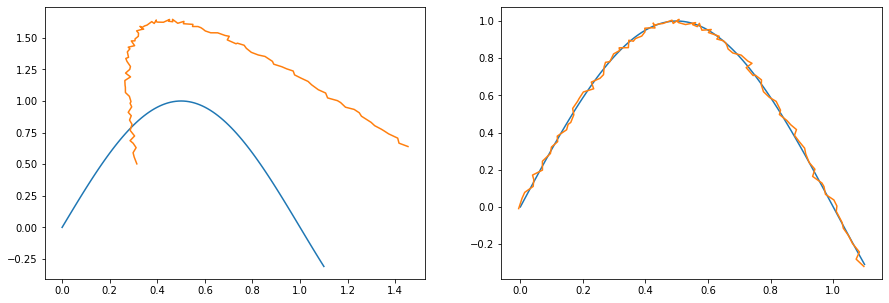

0.997388053701175
22.792146597954087
22.58187226617857
[[ 0.92191626  0.38400321 -0.48778657]
 [-0.38400321  0.92191626 -0.3517069 ]]


In [4]:
point_count = 100
th = np.pi / 8
move = np.array([[0.30], [0.5]])
rnd_scale = 0.03

# Generate and plot a 2D curve
x1 = np.linspace(0, 1.1, point_count)
y1 = np.sin(x1 * np.pi)
d1 = np.array([x1, y1])
rot = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
rand = np.random.rand(2, point_count)*rnd_scale
d2 = np.dot(rot, d1) + move
d2 = np.add(d2, rand)

plt.rcParams["figure.figsize"] = (15, 5)
plt.subplot(1,2,1)
plt.plot(d1[0], d1[1])
plt.plot(d2[0], d2[1])

# Use ICP and plot transformed result
ret = Icp2d.icp(d1, d2)
plt.subplot(1,2,2)
plt.plot(d1[0], d1[1])
dst = np.array([d2.T], copy=True).astype(np.float32)
dst = cv2.transform(dst, ret)
plt.plot(dst[0].T[0], dst[0].T[1])
plt.show()

print(ret[0][0] * ret[0][0] + ret[0][1] * ret[0][1])
print(np.arccos(ret[0][0]) / 2 / np.pi * 360)
print(np.arcsin(ret[0][1]) / 2 / np.pi * 360)
print(ret)